In [1]:
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
from matplotlib.backends.backend_pdf import PdfPages

import numpy as np

%run ../JM_custom_figs.py
%run ../fx4roc.py
%run ../figs4roc.py

C:\Github\Distraction-Paper\JM_custom_figs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
datafolder = "C:\\Github\\Distraction-Paper\\data\\"
figfolder = "C:\\Github\\Distraction-Paper\\figs\\"
outputfolder = "C:\\Github\\Distraction-Paper\\output\\"

try:
    pickle_in = open(datafolder + "distraction_data_only_snips.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[modDict, disDict, habDict] = dill.load(pickle_in)

In [8]:
# loads in lick trials
pickle_in = open(outputfolder+"data4roc_licks.pickle", 'rb')
[mod_dis_hist, mod_notdis_hist, dis_dis_hist, dis_notdis_hist, hab_dis_hist, hab_notdis_hist] = dill.load(pickle_in)

# loads in photo snips
pickle_in = open(outputfolder+"data4roc_photo.pickle", 'rb')
[mod_dis_photo_snips_flat, mod_notdis_photo_snips_flat, dis_dis_photo_snips_flat, dis_notdis_photo_snips_flat, hab_dis_photo_snips_flat, hab_notdis_photo_snips_flat] = dill.load(pickle_in)


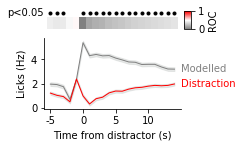

In [25]:
# Loads in ROC data for modelled vs distraction day ROC
try:
    pickle_in = open(outputfolder+"roc_licks_disday_disVnondis.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')
        
[a, p, data] = dill.load(pickle_in)
        
f = plt.figure(figsize=(3.4,2))
f, ax = plot_ROC_and_line(f, a, p, data[0], data[1],
                 cdict=['grey', 'white', 'red'],
                 colors = ['grey', 'red'],
                 labels=['Modelled', 'Distraction'],
                 labeloffset=0,
                 ylabel='Licks (Hz)')

# ax[1].set_yticks([-1, 0, 1])

f.savefig(figfolder+"fig2_roc-lickrate.pdf")

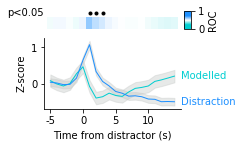

In [19]:
# Loads in ROC data for modelled vs distraction day ROC
try:
    pickle_in = open(outputfolder+"roc_photo_alltrials_modVdis.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')
        
[a, p, data] = dill.load(pickle_in)
        
f = plt.figure(figsize=(3.4,2))
f, ax = plot_ROC_and_line(f, a, p, data[0], data[1],
                 cdict = [(0, 'darkturquoise'), (0.25, 'darkturquoise'), (0.5, 'white'), (0.75, 'dodgerblue'), (1, 'dodgerblue')],
                 colors = ['darkturquoise', 'dodgerblue'],
                 labels=['Modelled', 'Distraction'],
                 labeloffset=0,
                 ylabel='Z-score')

# ax[1].set_yticks([-1, 0, 1])

f.savefig(figfolder+"fig3_roc-photo-modVdis.pdf")

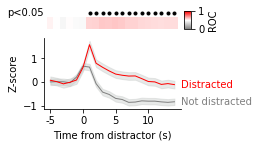

In [22]:
# Loads in ROC data for modelled vs distraction day ROC
try:
    pickle_in = open(outputfolder+"roc_photo_disday_disVnotdis.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')
        
[a, p, data] = dill.load(pickle_in)
        
f = plt.figure(figsize=(3.4,2))
f, ax = plot_ROC_and_line(f, a, p, data[0], data[1],
                 cdict=['grey', 'white', 'red'],
                 colors = ['grey', 'red'],
                 labels=['Not distracted', 'Distracted'],
                 labeloffset=0,
                 ylabel='Z-score')

# ax[1].set_yticks([-1, 0, 1])

f.savefig(figfolder+"fig4_roc-photo-disVnondis.pdf")

In [13]:
a


[0.5701482169418834,
 0.5888773114065886,
 0.5850869443752312,
 0.5284390785330826,
 0.48827024863901664,
 1.0,
 0.8490761924177559,
 0.8141814090802697,
 0.798366819942465,
 0.7612106522904539,
 0.7394160418601489,
 0.725496636238023,
 0.6994510763283274,
 0.6835911839989127,
 0.6699058448667707,
 0.6569755589281264,
 0.6465180721981865,
 0.6353961386579684,
 0.622967963093,
 0.6093581292802078]

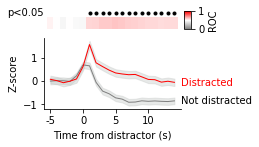

In [12]:
f = plt.figure(figsize=(3.4,2))
ax=[]

gs=gridspec.GridSpec(2,2, figure=f, height_ratios=[0.25, 1], width_ratios=[1, 0.05], wspace=0.05,
                    bottom=0.2, right=0.75, left=0.15)

ax.append(f.add_subplot(gs[0, 0]))

# Creates colormap for ROC

cdict = [(0, 'darkturquoise'), (0.25, 'darkturquoise'), (0.5, 'white'), (0.75, 'dodgerblue'), (1, 'dodgerblue')]
cdict=['grey', 'white', 'red']
heatmap_color_scheme = LinearSegmentedColormap.from_list('rocmap', cdict)

roc_for_plot = a + [0]
xvals=np.arange(-0.5,20.5)
yvals=[1, 2]
xx, yy = np.meshgrid(xvals, yvals)
    
mesh = ax[0].pcolormesh(xx, yy, [roc_for_plot, roc_for_plot], cmap=heatmap_color_scheme, shading = 'flat')
mesh.set_clim([0, 1])

threshold = 0.05/len(p)
sigpoints = np.array([pval < threshold for pval in p], dtype=bool)


xdata = [x for x, L in zip(range(len(sigpoints)), sigpoints) if L]
ydata = logical_subset(a, sigpoints)
ax[0].scatter(xdata, [2.5]*len(xdata), color='k', marker='.', clip_on=False)
ax[0].text(-1, 2.5, 'p<0.05', va='center', ha='right')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xticks([])
ax[0].set_yticks([])


cbar_ax = f.add_subplot(gs[0,1])   
cbar = f.colorbar(mesh, cax=cbar_ax, ticks=[0, 1], label='ROC')

ax.append(f.add_subplot(gs[1, 0]))

shadedError(ax[1], flatten_list(photo_snips_notdis), linecolor='grey')
shadedError(ax[1], flatten_list(photo_snips_dis), linecolor='red')

ax[1].set_ylabel('Z-score')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_xticks([0, 5, 10, 15])
ax[1].set_xticklabels(['-5', '0', '5', '10'])
ax[1].set_xlabel('Time from distractor (s)')

ax[1].text(20, np.mean(flatten_list(photo_snips_notdis), axis=0)[-1], 'Not distracted', color='k', ha='left', va='center')
ax[1].text(20, np.mean(flatten_list(photo_snips_dis), axis=0)[-1], 'Distracted', color='red', ha='left', va='center')

ax[0].set_xlim(ax[1].get_xlim())

f.savefig(figfolder+"fig3_roc-photo-disVnondis.pdf")


In [5]:
epoch1_mod, epoch1_dis = [], []
epoch2_mod, epoch2_dis = [], []
epoch3_mod, epoch3_dis = [], []

for day, epoch1, epoch2, epoch3 in zip([photo_snips_mod_day, photo_snips_dis_day],
                             [epoch1_mod, epoch1_dis],
                              [epoch2_mod, epoch2_dis],
                                      [epoch3_mod, epoch3_dis]):
    for rat in day:
        e1, e2, e3 = [], [], []
        for snip in rat:
            e1.append(np.mean(snip[0:5]))
            e2.append(np.mean(snip[6:9]))
            e3.append(np.mean(snip[9:]))
        epoch1.append(np.mean(e1))
        epoch2.append(np.mean(e2))
        epoch3.append(np.mean(e3))

Epoch 1 - pre 0.7430495132300441 0.4706672019396775
Epoch 2 - dis -2.7938530643336805 0.015207585946736157
Epoch 3 - post 0.4336395958584519 0.6716593062202525


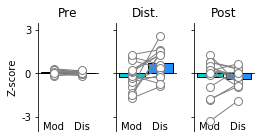

In [6]:
f, ax = plt.subplots(figsize=(4,2), ncols=3)
f.subplots_adjust(left=0.15, wspace=0.3)

colors=['darkturquoise', 'dodgerblue']

barscatter([epoch1_mod, epoch1_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           ax=ax[0])

barscatter([epoch2_mod, epoch2_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           ax=ax[1])

barscatter([epoch3_mod, epoch3_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           ax=ax[2])

for axis in ax:
    axis.set_xticks([])
    axis.set_ylim([-4, 3.5])
    axis.set_yticks([-3, 0, 3])
    axis.set_yticklabels([])
    axis.text(1, -3.9, 'Mod', ha='center')
    axis.text(2, -3.9, 'Dis', ha='center')
    
ax[0].set_ylabel('Z-score')


ax[0].set_yticklabels(["-3", '0', '3'])

ax[0].set_title('Pre')
ax[1].set_title('Dist.')
ax[2].set_title('Post')

f.savefig(figfolder+"fig3_photo_modVdis_epochs.pdf")

from scipy import stats

t, p = stats.ttest_rel(epoch1_mod, epoch1_dis)
print('Epoch 1 - pre', t, p)

t, p = stats.ttest_rel(epoch2_mod, epoch2_dis)
print('Epoch 2 - dis', t, p)

t, p = stats.ttest_rel(epoch3_mod, epoch3_dis)
print('Epoch 3 - post', t, p)

In [10]:
try:
    pickle_in = open(outputfolder+"roc_results_photo_disVnotdis.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[a, p, photo_snips_dis, photo_snips_notdis] = dill.load(pickle_in)

In [13]:
epoch1_dis, epoch1_notdis = [], []
epoch2_dis, epoch2_notdis = [], []
epoch3_dis, epoch3_notdis = [], []

for day, epoch1, epoch2, epoch3 in zip([photo_snips_dis, photo_snips_notdis],
                                       [epoch1_dis, epoch1_notdis],
                                       [epoch2_dis, epoch2_notdis],
                                       [epoch3_dis, epoch3_notdis]):
    for rat in day:
        e1, e2, e3 = [], [], []
        for snip in rat:
            e1.append(np.mean(snip[6:9]))
            e2.append(np.mean(snip[6:]))
            e3.append(np.mean(snip[9:]))
        epoch1.append(np.mean(e1))
        epoch2.append(np.mean(e2))
        epoch3.append(np.mean(e3))

Epoch 1 - pre -2.438924798061933 0.02982705931609603
Epoch 2 - dis -3.901469550154189 0.0018211015921871284
Epoch 3 - post -3.5686382954035167 0.0034317326226448357


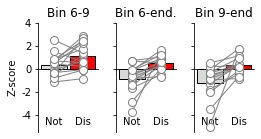

In [14]:
f, ax = plt.subplots(figsize=(4,2), ncols=3)
f.subplots_adjust(left=0.15, wspace=0.3)

colors=['xkcd:light grey', 'red']

barscatter([epoch1_notdis, epoch1_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           ax=ax[0])

barscatter([epoch2_notdis, epoch2_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           ax=ax[1])

barscatter([epoch3_notdis, epoch3_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           ax=ax[2])

for axis in ax:
    axis.set_xticks([])
    axis.set_ylim([-5.5, 4])
    axis.set_yticks([-4, -2, 0, 2, 4])
    axis.set_yticklabels([])
    axis.text(1, -4.9, 'Not', ha='center')
    axis.text(2, -4.9, 'Dis', ha='center')
    
ax[0].set_ylabel('Z-score')

ax[0].set_yticklabels(["-4", "-2", '0', '2', '4'])

ax[0].set_title('Bin 6-9')
ax[1].set_title('Bin 6-end.')
ax[2].set_title('Bin 9-end')

f.savefig(figfolder+"fig3_photo_disVnotdis_epochs.pdf")

from scipy import stats

t, p = stats.ttest_rel(epoch1_notdis, epoch1_dis)
print('Epoch 1 - pre', t, p)

t, p = stats.ttest_rel(epoch2_notdis, epoch2_dis)
print('Epoch 2 - dis', t, p)

t, p = stats.ttest_rel(epoch3_notdis, epoch3_dis)
print('Epoch 3 - post', t, p)